# 1. Importing libraries

In [15]:
import tensorflow as tf
import os
import cv2
import imghdr
import random
import numpy as np
import pathlib
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Spliting data in three directories

In [3]:
# Import helper functions
def split_dir_to_train_test_val(directory = "datasets/",
                            train_size = 0.6,
                            test_size = 0.2,
                            val_size = 0.2):
  """
  Creates 3 folders for Train, Test and Validation data
  """

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")

def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names

In [4]:
split_dir_to_train_test_val()

Folder Cid_Kagenou. Train data copied. 6 files
Folder Cid_Kagenou. Test data copied. 2 files
Folder Cid_Kagenou. Validation data copied. 2 files
Folder Gon_Freecss. Train data copied. 11 files
Folder Gon_Freecss. Test data copied. 4 files
Folder Gon_Freecss. Validation data copied. 4 files
Folder Kiyotaka_Ayanokouji. Train data copied. 8 files
Folder Kiyotaka_Ayanokouji. Test data copied. 3 files
Folder Kiyotaka_Ayanokouji. Validation data copied. 3 files
Folder Light_Yagami. Train data copied. 12 files
Folder Light_Yagami. Test data copied. 4 files
Folder Light_Yagami. Validation data copied. 4 files
Folder Satoru_Gojou. Train data copied. 11 files
Folder Satoru_Gojou. Test data copied. 4 files
Folder Satoru_Gojou. Validation data copied. 4 files
Folder Sousuke_Aizen. Train data copied. 6 files
Folder Sousuke_Aizen. Test data copied. 2 files
Folder Sousuke_Aizen. Validation data copied. 2 files
Folder Sukuna_Ryoumen. Train data copied. 6 files
Folder Sukuna_Ryoumen. Test data copied. 

# 2. Load data

In [5]:
class_names = get_class_names_from_folder(directory="files/train/")
class_names

array(['Cid_Kagenou', 'Gon_Freecss', 'Kiyotaka_Ayanokouji',
       'Light_Yagami', 'Satoru_Gojou', 'Sousuke_Aizen', 'Sukuna_Ryoumen'],
      dtype='<U19')

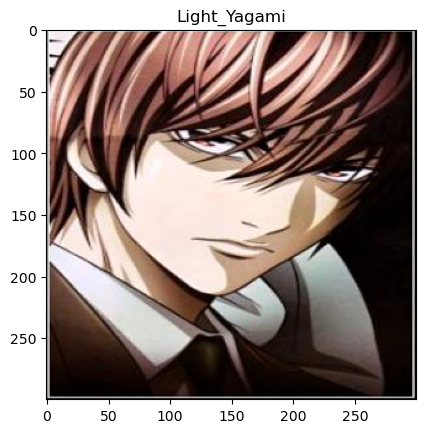

In [6]:
def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("files/test/", "Light_Yagami")

# 3. Preprocessing data

## 3.1 Splitting Data

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="files/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="files/test",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="files/validation",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

Found 60 images belonging to 7 classes.
Found 21 images belonging to 7 classes.
Found 22 images belonging to 7 classes.


## 4. Deep Learning

## 4.1 Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [9]:
model = Sequential()

In [10]:
# Create model
model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(7, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 10)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 33640)             0         
                                                                 
 dense (Dense)               (None, 7)                

## 4.2 Train

In [12]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [13]:
history = model.fit(train_data,
                    batch_size=32,
                    epochs=3,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

Epoch 1/3
2/2 [==============================] - 8s 968ms/step - loss: 2.0985 - accuracy: 0.1167 - val_loss: 1.9351 - val_accuracy: 0.3182
Epoch 2/3
2/2 [==============================] - 0s 141ms/step - loss: 1.6425 - accuracy: 0.4000 - val_loss: 1.7430 - val_accuracy: 0.3182
Epoch 3/3
2/2 [==============================] - 0s 143ms/step - loss: 1.4175 - accuracy: 0.6333 - val_loss: 1.6241 - val_accuracy: 0.5455


## 4.3 Evaluate

In [14]:
model.evaluate(test_data)

1/1 [==============================] - 0s 479ms/step - loss: 1.6825 - accuracy: 0.4762


[1.6825456619262695, 0.4761904776096344]

<Axes: >

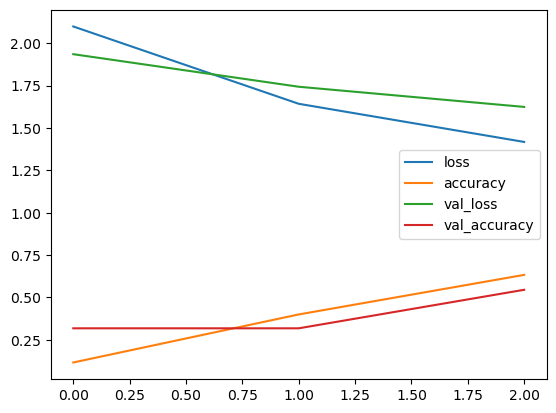

In [16]:
pd.DataFrame(history.history).plot()

# Making an actual prediction

In [17]:
def load_and_resize_image(filename, size):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, [size, size])
    img = img / 255

    return img

### using a picture of satorou Gojo

In [18]:
image = load_and_resize_image("gojo_try.jpg", 240)

In [19]:
pred = model.predict(tf.expand_dims(image, axis=0))
pred

1/1 [==============================] - 1s 713ms/step


array([[0.0671254 , 0.30768812, 0.18634224, 0.12415569, 0.17715223,
        0.05216027, 0.085376  ]], dtype=float32)

In [20]:
class_names[pred[0].argmax()]

'Gon_Freecss'